In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('..\\data\\checking-logs.sqlite.sqlite_copy')

In [24]:
df1 = pd.io.sql.read_sql(
    "select uid, datetime from pageviews where uid like 'user_%'",
    conn, parse_dates=['datetime']
    )
df2 = pd.io.sql.read_sql(
    "select uid, timestamp from checker where uid like 'user_%'",
    conn, parse_dates=['timestamp']
    )
df2

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


## Ищем общие вхождения по датам

In [25]:
df1 = df1['datetime'].dt.floor('d').value_counts()
df1 = df1.rename_axis('date')
df1 = df1.reset_index(name='views')
df2 = df2['timestamp'].dt.floor('d').value_counts()
df2 = df2.rename_axis('date')
df2 = df2.reset_index(name='commits')
df = pd.merge(left=df1, right=df2, how='inner', on='date', sort=True)
df = df.dropna()
df

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


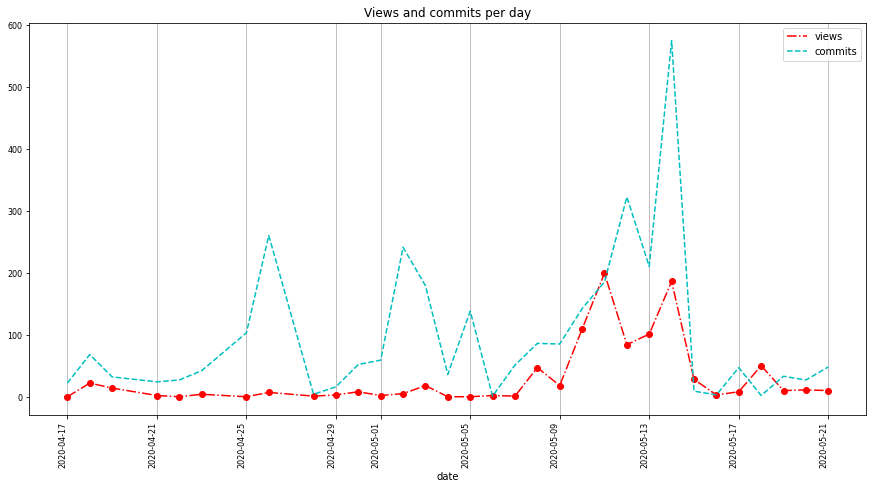

In [28]:
ax = df.plot(x='date', y=['views', 'commits'], figsize=(15, 8), title='Views and commits per day',
             color=['r', 'c'], style=['-.', '--'], rot=90, fontsize=8)
ax.get_lines()[0].set_marker('o')
ax.grid(axis='x')

## How many times was the number of views large than 150?
## The answer is 2

In [23]:
conn.close()